<H1>AR

            Temperature
Date                   
01-01-1981         20.7
02-01-1981         17.9
03-01-1981         18.8
04-01-1981         14.6
05-01-1981         15.8


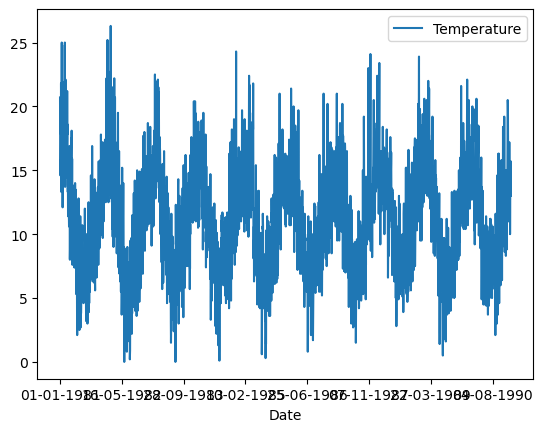

In [24]:
import pandas as pd
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

C:\Users\afrah\AppData\Local\Temp\ipykernel_11956\432076665.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


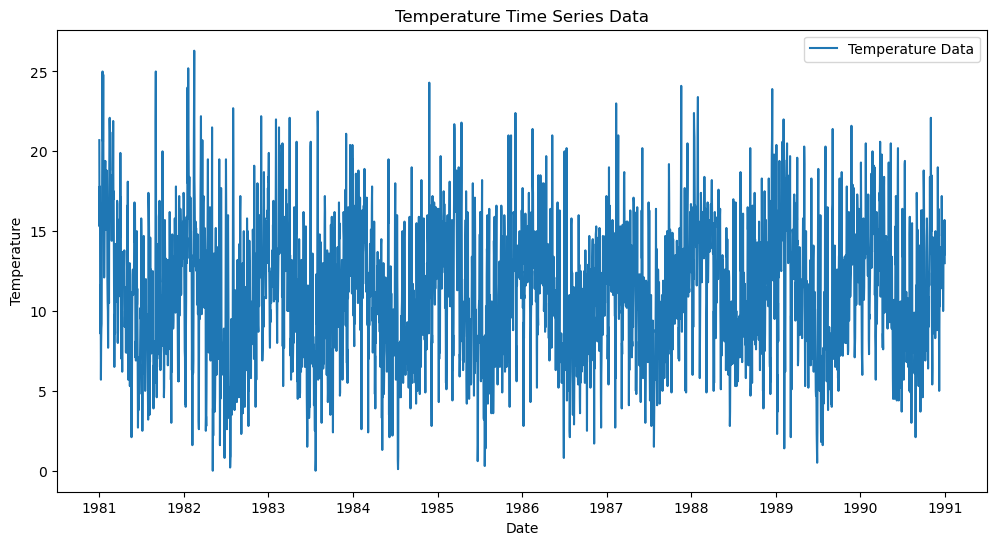

In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('daily-min-temperatures.csv')  # Replace 'temperature_data.csv' with your dataset file

# Convert the date column to datetime type (if it's not already)
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Sort the data by date (just to be safe)
data = data.sort_index()

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature'], label='Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Time Series Data')
plt.legend()
plt.show()

C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Ind

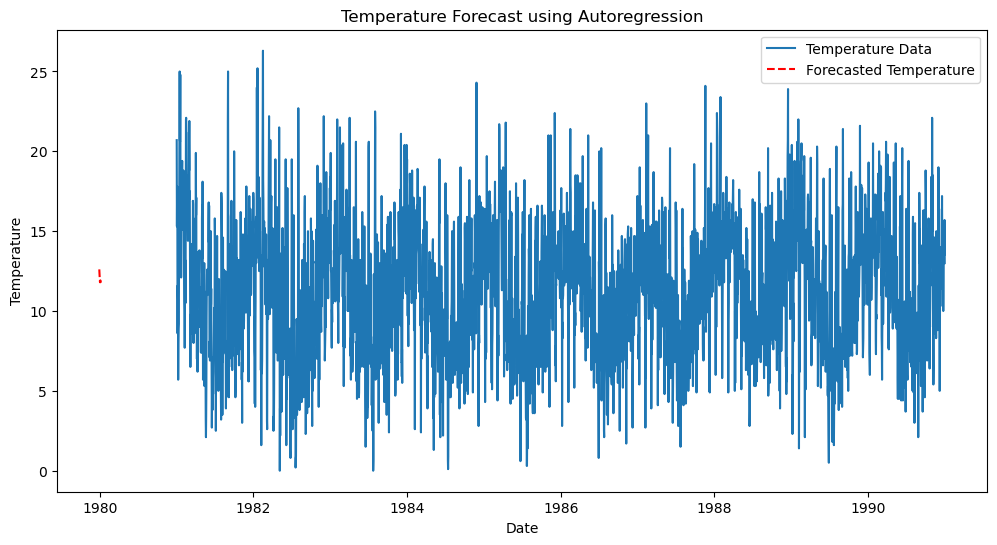

In [28]:
# Create an autoregressive model (AR)
lags = 7  # Number of lags for the autoregressive model (you can change this)
model = sm.tsa.AutoReg(data['Temperature'], lags=lags)
results = model.fit()

# Perform forecasting
forecast_values = results.predict(start=len(data), end=len(data) + lags - 1, dynamic=False)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature'], label='Temperature Data')
plt.plot(forecast_values.index, forecast_values, label='Forecasted Temperature', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Forecast using Autoregression')
plt.legend()
plt.show()

In [29]:
# Print the forecasted values
print("Forecasted Temperature Values:")
print(forecast_values)

Forecasted Temperature Values:
3650    12.607152
3651    12.331274
3652    12.072388
3653    11.820248
3654    11.796653
3655    11.919470
3656    11.769712
dtype: float64


<h1>MA

C:\Users\afrah\AppData\Local\Temp\ipykernel_11956\883677629.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


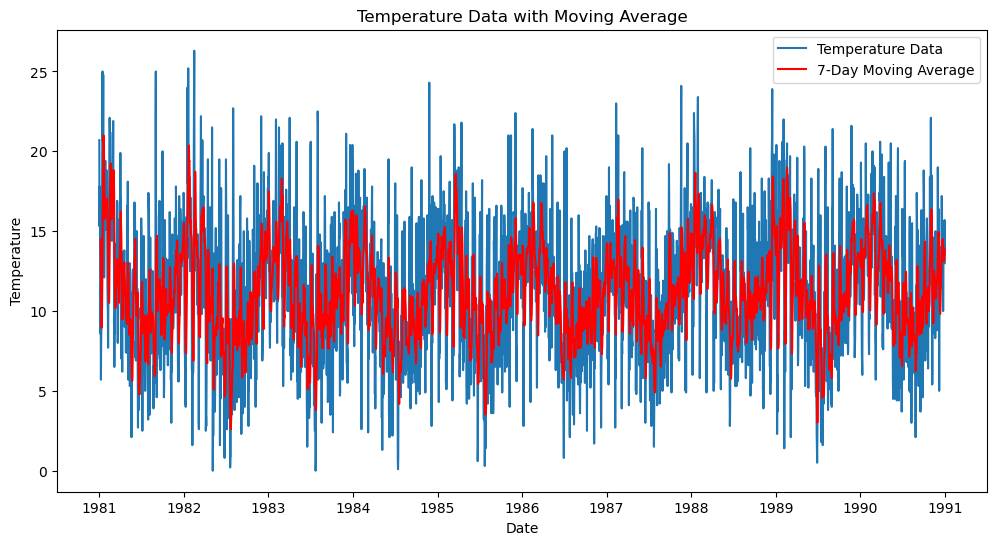

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('daily-min-temperatures.csv')  
# Convert the date column to datetime type (if it's not already)
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Sort the data by date (just to be safe)
data = data.sort_index()

# Define the window size for the moving average
window_size = 7  # Adjust the window size as needed

# Calculate the moving average
moving_average = data['Temperature'].rolling(window=window_size).mean()

# Plot the original data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature'], label='Temperature Data')
plt.plot(moving_average.index, moving_average, label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Data with Moving Average')
plt.legend()
plt.show()

In [31]:
# Print the moving average values (the first few values will be NaN due to the rolling window)
print("Moving Average Values:")
print(moving_average)

Moving Average Values:
Date
1981-01-01          NaN
1981-01-02          NaN
1981-01-03          NaN
1981-01-04          NaN
1981-01-05          NaN
                ...    
1990-12-27    13.100000
1990-12-28    13.171429
1990-12-29    13.214286
1990-12-30    13.471429
1990-12-31    13.900000
Name: Temperature, Length: 3650, dtype: float64


<h1> ARMA

C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


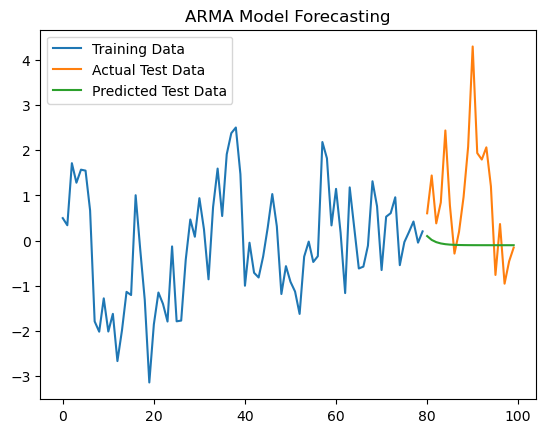

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate a sample time series data
np.random.seed(42)
n = 100
ar_params = [0.7]
ma_params = [0.2]
y = [np.random.normal()]
for i in range(1, n):
    y.append(ar_params[0] * y[i-1] + np.random.normal() + ma_params[0] * np.random.normal())

# Create a pandas DataFrame
data = pd.DataFrame(y, columns=['Value'])

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARMA model
order = (1, 0, 1)  # AR order, differencing, and MA order
arma_model = ARIMA(train['Value'], order=order)
arma_fit = arma_model.fit()

# Make predictions
start = len(train)
end = start + len(test) - 1
predictions = arma_fit.predict(start=start, end=end, typ='levels')

# Plot the results
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(predictions, label='Predicted Test Data')
plt.title('ARMA Model Forecasting')
plt.legend()
plt.show()


In [10]:
#pip install --upgrade statsmodels

<h1> ARIMA

C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


           Pred         Act
100  104.626481  104.015386
101  104.433114  102.075432
102  104.417684  107.910815
103  104.416453  110.615635
104  104.416355  108.241822
..          ...         ...
195  104.416346  198.360868
196  104.416346  205.416215
197  104.416346  201.505982
198  104.416346  199.256032
199  104.416346  206.034237

[100 rows x 2 columns]


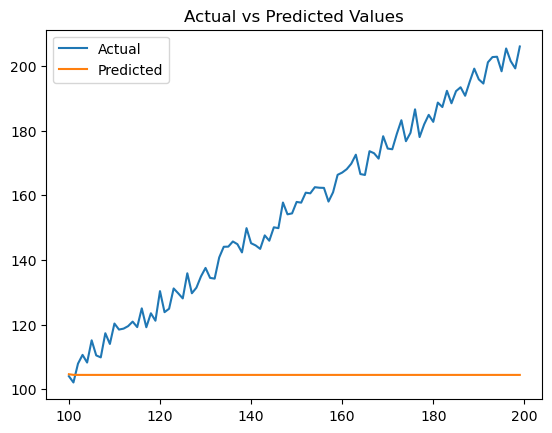

In [7]:
import pandas as pd
from random import random
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def ARIMA_model(train, test):
    # Fit ARIMA model
    model = ARIMA(train['Act'], order=(1, 1, 1))
    model_fit = model.fit()
    
    # Make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, typ='levels')
    
    # Create a DataFrame with predicted and actual values
    res = pd.DataFrame({"Pred": yhat, "Act": test["Act"].values})
    
    return res

# Generate random data for training and testing
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)], columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)], columns=['Act'])

# Apply the ARIMA model
df_results = ARIMA_model(df_train, df_test)

# Display the results or perform additional visualization
print(df_results)

# Optionally, you can plot the actual vs predicted values
plt.plot(df_results['Act'], label='Actual')
plt.plot(df_results['Pred'], label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()



<h1> SARIMA

C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


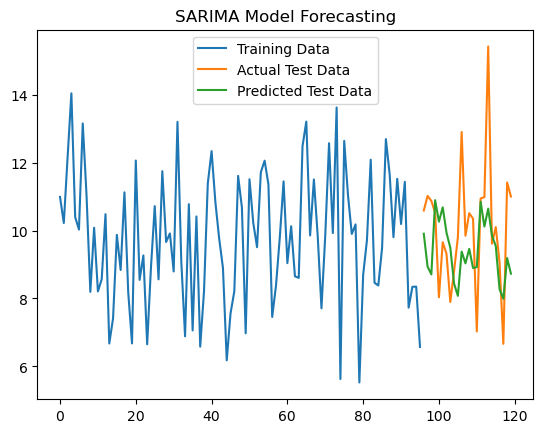

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate a sample time series data with seasonality
np.random.seed(42)
n = 120
t = np.arange(n)
y = 10 + np.sin(2 * np.pi * t / 12) + np.random.normal(scale=2, size=n)

# Create a pandas DataFrame
data = pd.DataFrame(y, columns=['Value'])

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit SARIMA model
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order (p, d, q, s)
sarima_model = SARIMAX(train['Value'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Make predictions
start = len(train)
end = start + len(test) - 1
predictions = sarima_fit.predict(start=start, end=end, typ='levels')

# Plot the results
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(predictions, label='Predicted Test Data')
plt.title('SARIMA Model Forecasting')
plt.legend()
plt.show()


<H1>SARIMAX

C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


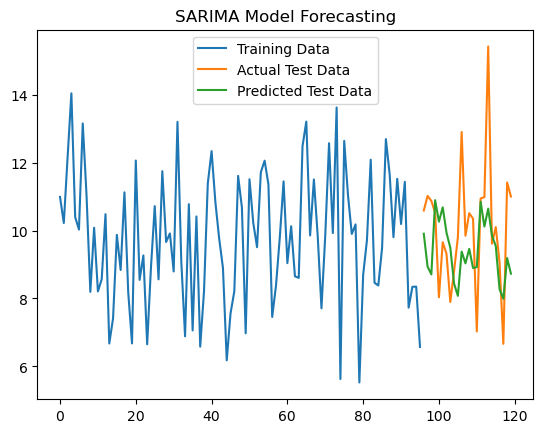

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate a sample time series data with seasonality
np.random.seed(42)
n = 120
t = np.arange(n)
y = 10 + np.sin(2 * np.pi * t / 12) + np.random.normal(scale=2, size=n)

# Create a pandas DataFrame
data = pd.DataFrame(y, columns=['Value'])

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit SARIMA model
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order (p, d, q, s)
sarima_model = SARIMAX(train['Value'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Make predictions
start = len(train)
end = start + len(test) - 1
predictions = sarima_fit.predict(start=start, end=end, typ='levels')

# Plot the results
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(predictions, label='Predicted Test Data')
plt.title('SARIMA Model Forecasting')
plt.legend()
plt.show()


<h1>VAR

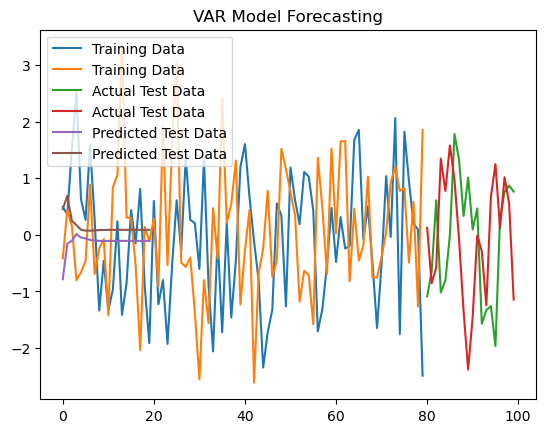

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

# Generate synthetic multivariate time series data
np.random.seed(42)
n = 100
t = np.arange(n)
data = pd.DataFrame({
    'Variable1': np.sin(2 * np.pi * t / 12) + np.random.normal(scale=1, size=n),
    'Variable2': np.cos(2 * np.pi * t / 12) + np.random.normal(scale=1, size=n)
})

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit VAR model
model = VAR(train)
var_fit: VARResults = model.fit(maxlags=2)  # Adjust maxlags as needed

# Make predictions
lag_order = var_fit.k_ar
predictions = var_fit.forecast(train.values[-lag_order:], steps=len(test))

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, columns=data.columns)

# Plot the results
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(predictions_df, label='Predicted Test Data')
plt.title('VAR Model Forecasting')
plt.legend()
plt.show()


<h1>VARMA

C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


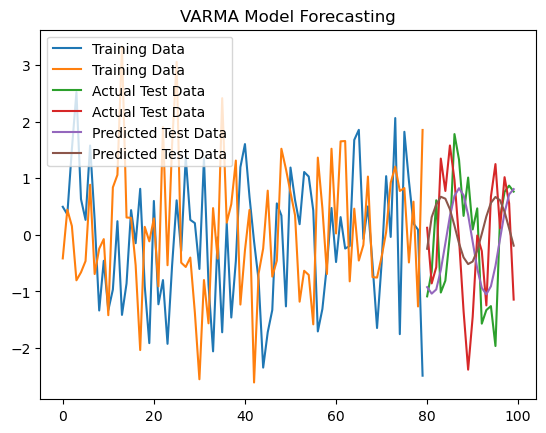

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.vector_ar.var_model import VARResults

# Generate synthetic multivariate time series data
np.random.seed(42)
n = 100
t = np.arange(n)
data = pd.DataFrame({
    'Variable1': np.sin(2 * np.pi * t / 12) + np.random.normal(scale=1, size=n),
    'Variable2': np.cos(2 * np.pi * t / 12) + np.random.normal(scale=1, size=n)
})

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit VARMAX model
order = (2, 1)  # Order of the autoregressive and moving average components
model = VARMAX(train, order=order)
varmax_fit = model.fit(disp=False)  # Adjust disp as needed

# Make predictions
predictions = varmax_fit.get_forecast(steps=len(test)).predicted_mean

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, columns=data.columns)

# Plot the results
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(predictions_df, label='Predicted Test Data')
plt.title('VARMA Model Forecasting')
plt.legend()
plt.show()


<H1>VARMAX

C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, 

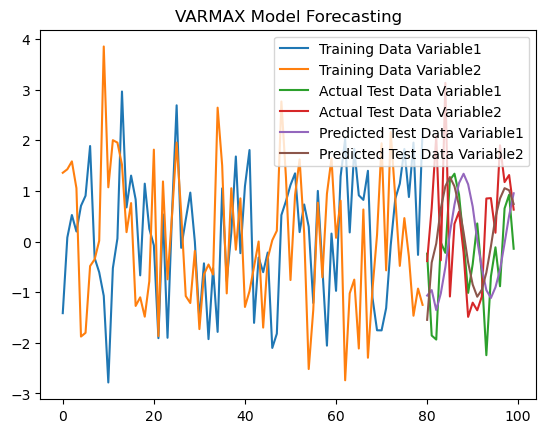

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX

# Generate synthetic multivariate time series data with exogenous variable
np.random.seed(42)
n = 100
t = np.arange(n)
exog_variable = np.random.normal(size=n)
data = pd.DataFrame({
    'Variable1': np.sin(2 * np.pi * t / 12) + np.random.normal(scale=1, size=n),
    'Variable2': np.cos(2 * np.pi * t / 12) + np.random.normal(scale=1, size=n),
    'Exog_Variable': exog_variable
})

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit VARMAX model with exogenous variable
order = (2, 1)  # Order of the autoregressive and moving average components
varmax_model = VARMAX(train[['Variable1', 'Variable2']], order=order, exog=train['Exog_Variable'])
varmax_fit = varmax_model.fit(disp=False)  # Adjust disp as needed

# Make predictions
predictions = varmax_fit.get_forecast(steps=len(test), exog=test['Exog_Variable']).predicted_mean

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Variable1', 'Variable2'])

# Plot the results
plt.plot(train['Variable1'], label='Training Data Variable1')
plt.plot(train['Variable2'], label='Training Data Variable2')
plt.plot(test['Variable1'], label='Actual Test Data Variable1')
plt.plot(test['Variable2'], label='Actual Test Data Variable2')
plt.plot(predictions_df['Variable1'], label='Predicted Test Data Variable1')
plt.plot(predictions_df['Variable2'], label='Predicted Test Data Variable2')
plt.title('VARMAX Model Forecasting')
plt.legend()
plt.show()


<h1>SES

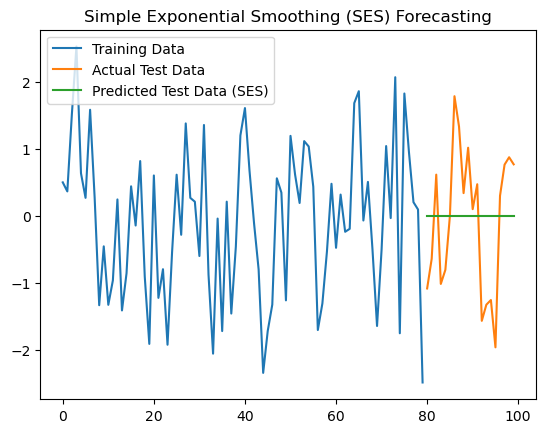

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Generate synthetic time series data
np.random.seed(42)
n = 100
t = np.arange(n)
y = np.sin(2 * np.pi * t / 12) + np.random.normal(scale=1, size=n)

# Create a pandas DataFrame
data = pd.DataFrame({'Value': y})

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit Simple Exponential Smoothing model
ses_model = SimpleExpSmoothing(train['Value'])
ses_fit = ses_model.fit()

# Make predictions
predictions = ses_fit.forecast(len(test))

# Plot the results
plt.plot(train['Value'], label='Training Data')
plt.plot(test['Value'], label='Actual Test Data')
plt.plot(test.index, predictions, label='Predicted Test Data (SES)')
plt.title('Simple Exponential Smoothing (SES) Forecasting')
plt.legend()
plt.show()


<h1> HWES

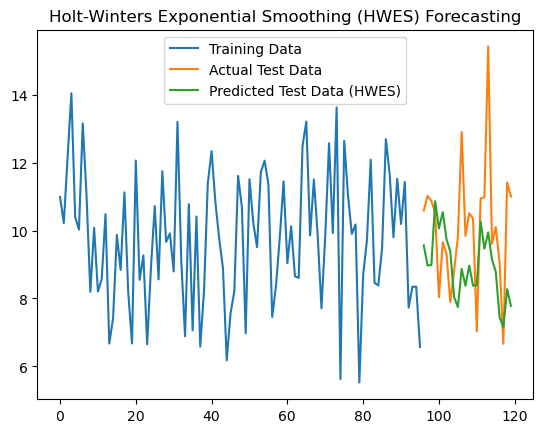

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate synthetic time series data with seasonality
np.random.seed(42)
n = 120
t = np.arange(n)
y = 10 + np.sin(2 * np.pi * t / 12) + np.random.normal(scale=2, size=n)

# Create a pandas DataFrame
data = pd.DataFrame({'Value': y})

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit Holt-Winters Exponential Smoothing model
hwes_model = ExponentialSmoothing(train['Value'], trend='add', seasonal='add', seasonal_periods=12)
hwes_fit = hwes_model.fit()

# Make predictions
predictions = hwes_fit.forecast(len(test))

# Plot the results
plt.plot(train['Value'], label='Training Data')
plt.plot(test['Value'], label='Actual Test Data')
plt.plot(test.index, predictions, label='Predicted Test Data (HWES)')
plt.title('Holt-Winters Exponential Smoothing (HWES) Forecasting')
plt.legend()
plt.show()
